In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('ACIDENTES.xlsx')
df.head()

,OCORRÊNCIA,GRAVIDADE,MOT_ALCOOL,VÍTIMA,DIA,TURNO,NUM_VEÍCULOS,DISTÂNCIA,TEMPO_CHEGADA,TEMPO_ATENDIMENTO
0,1,ALTA,SIM,NÃO,FIM-DE-SEMANA,NOITE,2,3.7,12,42
1,2,MÉDIA,SIM,NÃO,DURANTE A SEMANA,MADRUGADA,5,4.5,36,58
2,3,BAIXA,NÃO,NÃO,DURANTE A SEMANA,MADRUGADA,3,1.5,48,38
3,4,BAIXA,NÃO,NÃO,DURANTE A SEMANA,MANHÃ,4,1.7,56,48
4,5,MÉDIA,NÃO,NÃO,DURANTE A SEMANA,NOITE,2,2.4,13,27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OCORRÊNCIA         110 non-null    int64  
 1   GRAVIDADE          110 non-null    object 
 2   MOT_ALCOOL         110 non-null    object 
 3   VÍTIMA             110 non-null    object 
 4   DIA                110 non-null    object 
 5   TURNO              110 non-null    object 
 6   NUM_VEÍCULOS       110 non-null    int64  
 7   DISTÂNCIA          110 non-null    float64
 8   TEMPO_CHEGADA      110 non-null    int64  
 9   TEMPO_ATENDIMENTO  110 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 8.7+ KB


In [7]:
ax = df.describe().round(2)
ax


,OCORRÊNCIA,NUM_VEÍCULOS,DISTÂNCIA,TEMPO_CHEGADA,TEMPO_ATENDIMENTO
count,110.00,110.00,110.00,110.00,110.00
mean,55.50,2.46,5.92,28.02,38.79
std,31.90,1.08,2.45,12.43,13.85
min,1.00,1.00,1.10,7.00,14.00
25%,28.25,2.00,4.35,19.00,27.00
50%,55.50,2.00,5.95,26.50,38.50
75%,82.75,3.00,7.38,35.75,48.00
max,110.00,6.00,11.30,56.00,74.00


In [8]:
data = df['GRAVIDADE'].value_counts()
data

BAIXA    58
MÉDIA    33
ALTA     19
Name: GRAVIDADE, dtype: int64

In [9]:
data = df['GRAVIDADE'].value_counts(normalize=True)
data

BAIXA    0.527273
MÉDIA    0.300000
ALTA     0.172727
Name: GRAVIDADE, dtype: float64

array([<AxesSubplot:ylabel='GRAVIDADE'>], dtype=object)

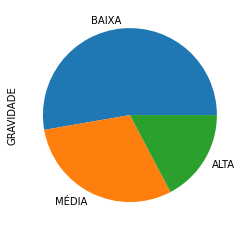

In [10]:
data.plot(kind='pie', subplots=True)

In [11]:
data = df.pivot_table(index=['GRAVIDADE','VÍTIMA'], aggfunc='size')
data

GRAVIDADE  VÍTIMA
ALTA       NÃO        5
           SIM       14
BAIXA      NÃO       53
           SIM        5
MÉDIA      NÃO       26
           SIM        7
dtype: int64

In [12]:
df.value_counts(['GRAVIDADE','VÍTIMA'])

GRAVIDADE  VÍTIMA
BAIXA      NÃO       53
MÉDIA      NÃO       26
ALTA       SIM       14
MÉDIA      SIM        7
BAIXA      SIM        5
ALTA       NÃO        5
dtype: int64

In [13]:
pd.crosstab(df['GRAVIDADE'],df['VÍTIMA']).iloc[[1,2,0]]

VÍTIMA,NÃO,SIM
GRAVIDADE,,
BAIXA,53,5
MÉDIA,26,7
ALTA,5,14


In [14]:
pd.crosstab(df['GRAVIDADE'],df['VÍTIMA'], normalize=True).iloc[[1,2,0]]

VÍTIMA,NÃO,SIM
GRAVIDADE,,
BAIXA,0.481818,0.045455
MÉDIA,0.236364,0.063636
ALTA,0.045455,0.127273


In [15]:
data = df['TURNO'].value_counts().iloc[[3,2,0,1]]
data

MADRUGADA    16
MANHÃ        24
TARDE        36
NOITE        34
Name: TURNO, dtype: int64

In [16]:
data = df['TURNO'].value_counts(normalize=True).iloc[[3,2,0,1]]
data

MADRUGADA    0.145455
MANHÃ        0.218182
TARDE        0.327273
NOITE        0.309091
Name: TURNO, dtype: float64

array([<AxesSubplot:ylabel='TURNO'>], dtype=object)

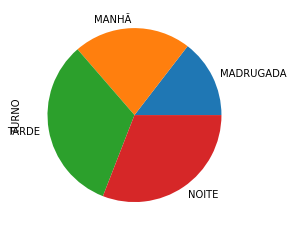

In [17]:
data.plot(kind='pie', subplots=True)

In [18]:
pd.crosstab(df['TURNO'],df['MOT_ALCOOL']).iloc[[0,1,3,2]]

MOT_ALCOOL,NÃO,SIM
TURNO,,
MADRUGADA,6,10
MANHÃ,21,3
TARDE,28,8
NOITE,22,12


In [19]:
pd.crosstab(df['TURNO'],df['MOT_ALCOOL'], normalize=True).iloc[[0,1,3,2]]

MOT_ALCOOL,NÃO,SIM
TURNO,,
MADRUGADA,0.054545,0.090909
MANHÃ,0.190909,0.027273
TARDE,0.254545,0.072727
NOITE,0.200000,0.109091
